In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Hyper Parameters
BATCH_SIZE = 64
LR_G = 0.0001           # learning rate for generator
LR_D = 0.0001           # learning rate for discriminator
N_IDEAS = 5             # think of this as number of ideas for generating an art work (Generator)
ART_COMPONENTS = 15     # it could be total point G can draw in the canvas
PAINT_POINTS = np.vstack([np.linspace(-1, 1, ART_COMPONENTS) for _ in range(BATCH_SIZE)])

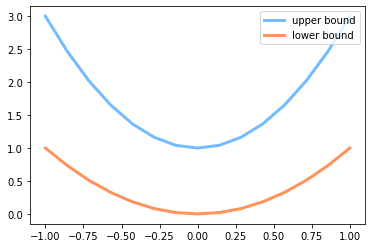

In [ ]:
# show painting range
plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
plt.legend(loc='upper right')
plt.show()

In [ ]:
print(PAINT_POINTS.shape)
print(PAINT_POINTS)

(64, 15)
[[-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
  -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
   0.71428571  0.85714286  1.        ]
 [-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
  -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
   0.71428571  0.85714286  1.        ]
 [-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
  -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
   0.71428571  0.85714286  1.        ]
 [-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
  -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
   0.71428571  0.85714286  1.        ]
 [-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
  -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
   0.71428571  0.85714286  1.        ]
 [-1.         -0.85714286 -0.71428571 -0.57142857 -0.428

In [ ]:
def artist_works():
  a = np.random.uniform(1,2,size=BATCH_SIZE)[:,np.newaxis]
  paintings = a*PAINT_POINTS**2+(a-1)
  return torch.from_numpy(paintings).float()

In [ ]:
a = np.random.uniform(1,2,size=BATCH_SIZE)[:,np.newaxis]
print(a)
paintings = a*PAINT_POINTS**2+(a-1)
print(paintings)

[[1.99380319]
 [1.71073052]
 [1.45022409]
 [1.89345933]
 [1.70935999]
 [1.62382802]
 [1.79960832]
 [1.08055436]
 [1.60448087]
 [1.28838873]
 [1.30831844]
 [1.3204195 ]
 [1.12651036]
 [1.47695083]
 [1.97619434]
 [1.00882876]
 [1.97497881]
 [1.33854942]
 [1.54143828]
 [1.8515023 ]
 [1.66717446]
 [1.71227719]
 [1.07027396]
 [1.59695643]
 [1.58813553]
 [1.50143226]
 [1.96424786]
 [1.85473871]
 [1.28986399]
 [1.62200682]
 [1.18351348]
 [1.18764982]
 [1.42193458]
 [1.61436716]
 [1.36093171]
 [1.91820301]
 [1.20722852]
 [1.26817194]
 [1.62068711]
 [1.76523873]
 [1.65393191]
 [1.72082946]
 [1.02574638]
 [1.18755291]
 [1.14289818]
 [1.97856305]
 [1.99243554]
 [1.0390278 ]
 [1.72873498]
 [1.26111214]
 [1.87438696]
 [1.62690653]
 [1.98922679]
 [1.45724278]
 [1.22969317]
 [1.97635494]
 [1.42773592]
 [1.96677728]
 [1.397097  ]
 [1.5596599 ]
 [1.17788776]
 [1.91218553]
 [1.10609734]
 [1.79970033]]
[[2.98760638 2.45863819 2.01104972 1.64484097 1.36001194 1.15656264
  1.03449305 0.99380319 1.03449305 

In [ ]:
G = nn.Sequential(
    nn.Linear(N_IDEAS,128),
    nn.ReLU(),
    nn.Linear(128,ART_COMPONENTS)
)

In [ ]:
D = nn.Sequential(
    nn.Linear(ART_COMPONENTS,128),
    nn.ReLU(),
    nn.Linear(128,1), # true or false
    nn.Sigmoid()
)

In [ ]:
# optimizer
opt_D = torch.optim.Adam(D.parameters(),lr=LR_D)
opt_G = torch.optim.Adam(G.parameters(),lr=LR_G)

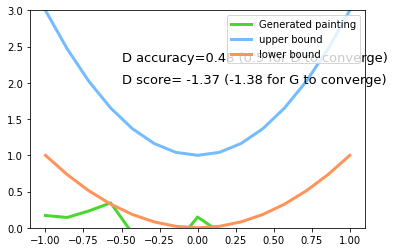

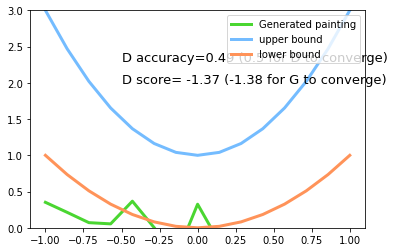

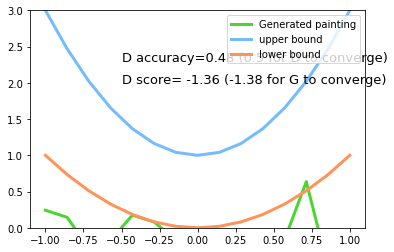

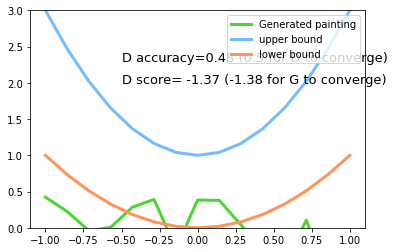

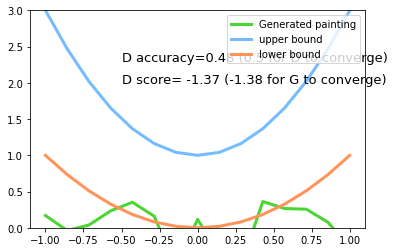

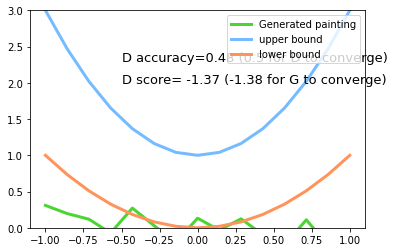

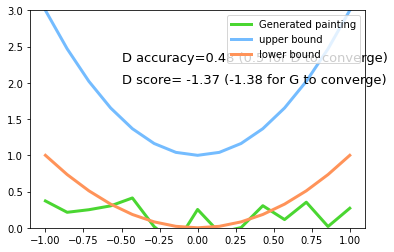

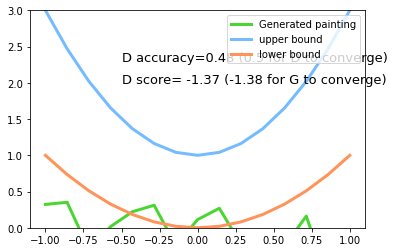

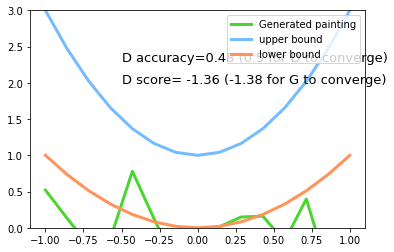

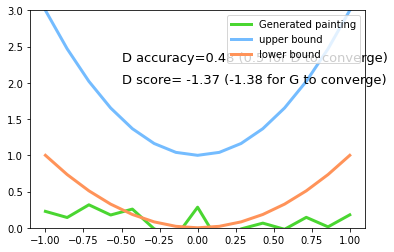

In [ ]:
for step in range(10000):
  # Generate paintings
  artist_paintings = artist_works() # real painting
  G_ideas = torch.randn(BATCH_SIZE,N_IDEAS,requires_grad=True)
  G_paintings = G(G_ideas)  # fake painting

  # probability of who draw
  prob_artist0 = D(artist_paintings)  # try to increase this
  prob_artist1 = D(G_paintings)    # try to decrease this

  D_loss = -torch.mean(torch.log(prob_artist0)+torch.log(1-prob_artist1))
  #              is real artist     is not from generator
  G_loss = torch.mean(torch.log(1-prob_artist1))

  opt_D.zero_grad()
  D_loss.backward(retain_graph=True)
  opt_D.step()

  opt_G.zero_grad()
  G_loss.backward()
  opt_G.step()

  # for visualization
  if step % 1000 == 0:  # plotting
    plt.cla()
    plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
    plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
    plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
    plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 13})
    plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 13})
    plt.ylim((0, 3));plt.legend(loc='upper right', fontsize=10);plt.draw();plt.pause(0.01)

tensor([[-7.4794e-01, -9.2175e-02, -6.3790e-01,  1.3055e-01, -4.1781e-01],
        [ 2.3959e+00,  8.2064e-01,  1.1861e+00,  1.0074e+00,  1.6817e+00],
        [ 9.7461e-01,  1.1243e+00, -4.8380e-01,  1.2663e+00, -1.0246e+00],
        [-1.5677e+00, -2.0557e+00, -8.0544e-01, -3.6596e-01,  8.8260e-01],
        [ 5.8101e-02,  3.4007e-01,  6.4236e-01,  2.8838e-01, -5.1713e-01],
        [ 1.0003e+00, -5.9740e-01, -3.3542e-01, -8.3892e-01, -1.0851e+00],
        [-1.5674e+00, -1.2417e+00,  1.1699e+00, -9.5129e-01,  1.0947e+00],
        [-6.6477e-01,  2.3853e-01,  4.8199e-01,  6.9140e-01, -1.1059e-01],
        [-1.6629e+00, -5.6482e-02,  7.7234e-01, -3.2107e-01, -1.7712e+00],
        [-1.5448e+00, -1.1675e-01, -3.1763e-01, -8.0892e-01,  7.3201e-01],
        [ 2.7435e-01, -2.4952e+00, -1.0679e+00,  5.6877e-01, -6.6423e-01],
        [ 3.1185e-01, -6.3369e-01,  6.9114e-01,  4.8322e-01, -6.3393e-01],
        [-4.6204e-01, -1.9801e-01, -1.9782e+00, -6.6591e-01,  1.8755e+00],
        [-1.1682e+00,  1.

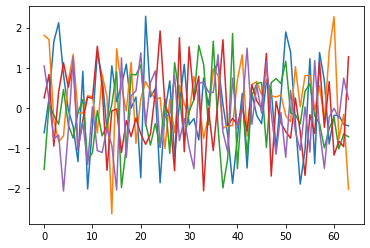

In [ ]:
print(torch.randn(BATCH_SIZE,N_IDEAS))
plt.plot(torch.randn(BATCH_SIZE,N_IDEAS))